<a href="https://colab.research.google.com/github/Drake-HeleneVeenstra/workshops/blob/main/MLworkshop_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vi startar med att importera vissa libraries som innehåller visualiseringsmöjligheter (matplotlib och seaborn) och de faktiska clusterings algoritmer (sklearn.cluster). Numpy underlättar datamanipulering, och sklearn.datasets ger möjlighet att skapa data (liknande 'load inline')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.datasets as data

plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

Sen skapar vi data och plottar den. Du kan ändra parametrar i moons och blobs för att ändra datans utseende

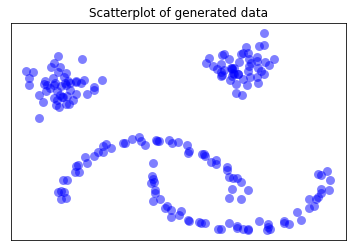

In [ ]:
moons, _ = data.make_moons(n_samples=100, noise=0.05)
blobs, _ = data.make_blobs(n_samples=100, centers=[(1, 2.25), (-1.0, 1.9)], cluster_std=0.2)
data = np.vstack([moons, blobs])

# Plot:

plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
plt.title('Scatterplot of generated data')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

Vi kan fitta en K-means klustering algoritm. Testa att ändra antal clusters i variabeln 'kwargs' from 5 till något annat

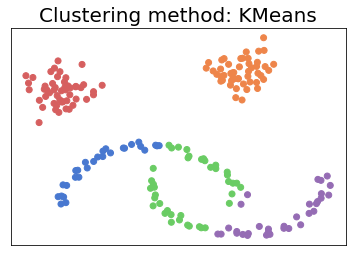

In [ ]:
  # Number of clusters predefined in kwargs
  kwargs = {'n_clusters': 5}
  
  algorithm = cluster.KMeans
  labels = algorithm(**kwargs).fit_predict(data)
  palette = sns.color_palette('muted', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Clustering method: {}'.format(str(algorithm.__name__)),
            fontsize=20);


K-means - partitioning algorithm assuming global partitions (centroid-based). 
Needs specification on number of clusters.
Performance: poor: splices and clumps incorrectly

Det går inte att anpassa K-means clustering så att den beskriver de månar i vårt datasett på ett bra sätt. Vi kan testa andra algoritmer, och ändra i 'hyperparameters' för att ändra algoritmens beteende:

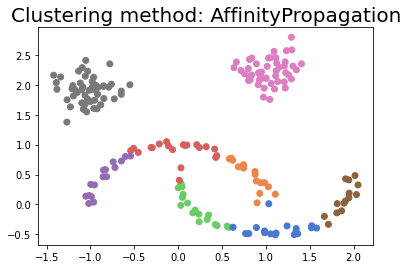

In [ ]:
  kwargs = {'preference': -6.0, 'damping': 0.85}
  
  algorithm = cluster.AffinityPropagation
  labels = algorithm(**kwargs).fit_predict(data)
  palette = sns.color_palette('muted', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Clustering method: {}'.format(str(algorithm.__name__)),
            fontsize=20);

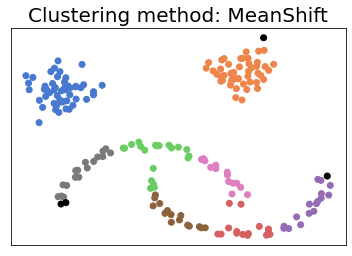

In [ ]:
  args = (0.6,)
  kwargs = {'cluster_all': False}
  
  algorithm = cluster.MeanShift
  labels = algorithm(*args, **kwargs).fit_predict(data)
  palette = sns.color_palette('muted', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Clustering method: {}'.format(str(algorithm.__name__)),
            fontsize=20);